In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First of all, we are going to use Global Forest Watch's Tree cover loss for Indonesia, and analyze Lampung in particular. 

In [10]:
gfw_sub1 = pd.read_excel("IDN.xlsx", sheet_name="Subnational 1 tree cover loss")

In [25]:
lampung_sub1 = gfw_sub1[gfw_sub1["subnational1"] == "Lampung"].drop(columns=["subnational1", "country"])

In [26]:
lampung_sub1

,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,tc_loss_ha_2005,...,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023
128,0,3348754,3348754,3348754,165768,10563,9515,5047,10726,9547,...,15473,22366,27178,19799,20244,25969,16196,14385,12097,41879
129,10,3348754,1939890,1921727,165768,10422,9419,5010,10614,9414,...,11872,15078,17332,12566,11237,14452,10190,8318,7575,23636
130,15,3348754,1883329,1844080,165768,10400,9398,5003,10591,9390,...,11709,14738,16982,12301,10929,13998,9944,8071,7392,22955
131,20,3348754,1852529,1812044,165768,10374,9375,4995,10561,9358,...,11576,14503,16696,12105,10710,13684,9770,7894,7254,22487
132,25,3348754,1825715,1766970,165768,10356,9363,4987,10543,9340,...,11500,14377,16534,11987,10576,13490,9663,7789,7169,22175
133,30,3348754,1783155,1728358,165768,10336,9347,4982,10521,9319,...,11364,14133,16241,11762,10335,13176,9472,7605,7023,21635
134,50,3348754,1612475,1502408,165768,10095,9109,4893,10226,8993,...,10598,12910,14965,10763,9289,11775,8604,6779,6404,19425
135,75,3348754,1240851,1083452,165768,9171,8098,4452,8882,7495,...,8256,9545,11357,8176,6761,8409,6266,4849,4716,13531


In [27]:
gfw_sub2 = pd.read_excel("IDN.xlsx", sheet_name="Subnational 2 tree cover loss")

In [28]:
lampung_sub2 = gfw_sub2[gfw_sub2["subnational1"] == "Lampung"].drop(columns=["subnational1", "country"])
lampung_sub2

,subnational2,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,...,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023
1952,Bandar Lampung,0,17529,17529,17529,205,33,13,3,12,...,7,15,25,36,30,15,17,24,25,31
1953,Bandar Lampung,10,17529,6521,5059,205,33,12,3,11,...,6,9,17,26,20,9,12,11,15,16
1954,Bandar Lampung,15,17529,6254,4809,205,32,12,3,11,...,6,9,16,26,19,9,11,10,15,16
1955,Bandar Lampung,20,17529,6125,4739,205,32,12,3,11,...,6,9,15,26,18,9,11,9,15,15
1956,Bandar Lampung,25,17529,5983,4643,205,32,12,3,11,...,6,9,15,25,18,9,11,9,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,Way Kanan,20,357877,213325,186076,37859,1591,1209,1099,2686,...,2026,1257,2468,1454,1839,2030,1612,1615,1334,4767
2060,Way Kanan,25,357877,209064,179796,37859,1586,1208,1096,2679,...,2012,1242,2434,1429,1808,1987,1585,1587,1308,4670
2061,Way Kanan,30,357877,202341,177068,37859,1582,1205,1094,2672,...,1991,1217,2380,1391,1758,1927,1543,1545,1273,4519
2062,Way Kanan,50,357877,178783,153296,37859,1511,1172,1064,2564,...,1903,1110,2166,1248,1571,1693,1382,1379,1142,3989


There are many different definitions of a forest. The FAO considers an area > 0,5 ha, covered by trees taller > 5 m, with > 10% forming a canopy​ to be a forest. For the sake of this project, we will use the threshold of 30% canopy coverage, which is aligned with Indonesia's Regulation(P.14/2004): > 0,25 ha, covered by trees taller > 5 m, > 30% forming a canopy​. 

In [ ]:
lampung_sub1.loc[lampung_sub1["threshold"] == 30].pivot(index="year", columns = "loss", values="tc_loss_ha")

In [40]:
# Reshape the data to have 'year' as the index and 'tree cover lost' as the column
lampung_sub1_pivoted = lampung_sub1.loc[lampung_sub1["threshold"] == 30].melt(
    id_vars=["threshold"], 
    value_vars=[col for col in lampung_sub1.columns if col.startswith("tc_loss_ha_")],
    var_name="year",
    value_name="tree cover lost"
)

# Extract the year from the column names
lampung_sub1_pivoted["year"] = lampung_sub1_pivoted["year"].str.extract(r"(\d+)$").astype(int)

# Set 'year' as the index
lampung_sub1_pivoted = lampung_sub1_pivoted.set_index("year")

# Drop the 'threshold' column as it's not needed for the analysis
lampung_sub1_pivoted = lampung_sub1_pivoted.drop(columns=["threshold"])

lampung_sub1_pivoted

,tree cover lost
year,
2001,10336
2002,9347
2003,4982
2004,10521
2005,9319
2006,14047
2007,15583
2008,16173
2009,23141


<Axes: title={'center': 'Lampung Tree Cover Loss (Threshold 30)'}, xlabel='year'>

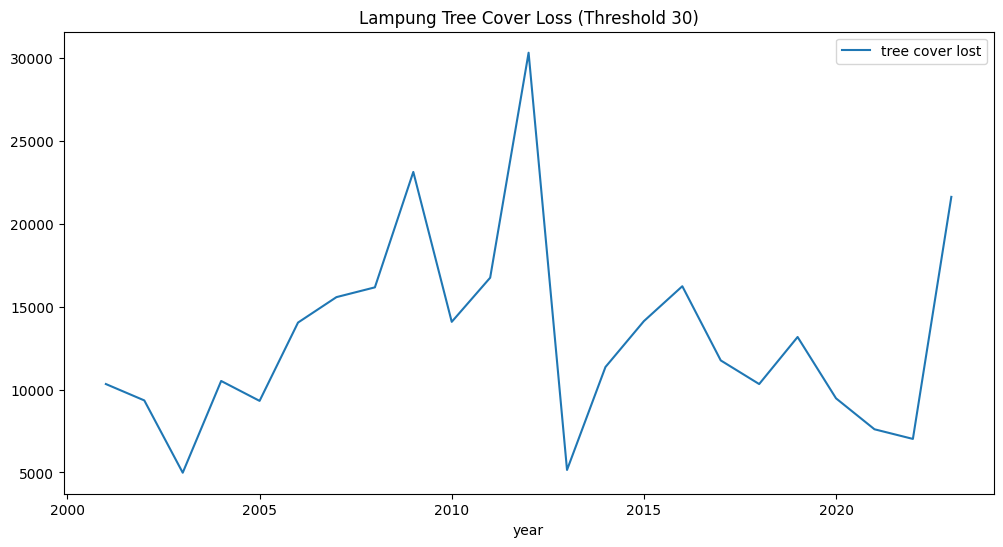

In [42]:
# Plotting the data

lampung_sub1_pivoted.plot(title="Lampung Tree Cover Loss (Threshold 30)", figsize=(12, 6))

<Axes: title={'center': 'Indonesia Total Tree Cover Loss (Threshold 30)'}, xlabel='year'>

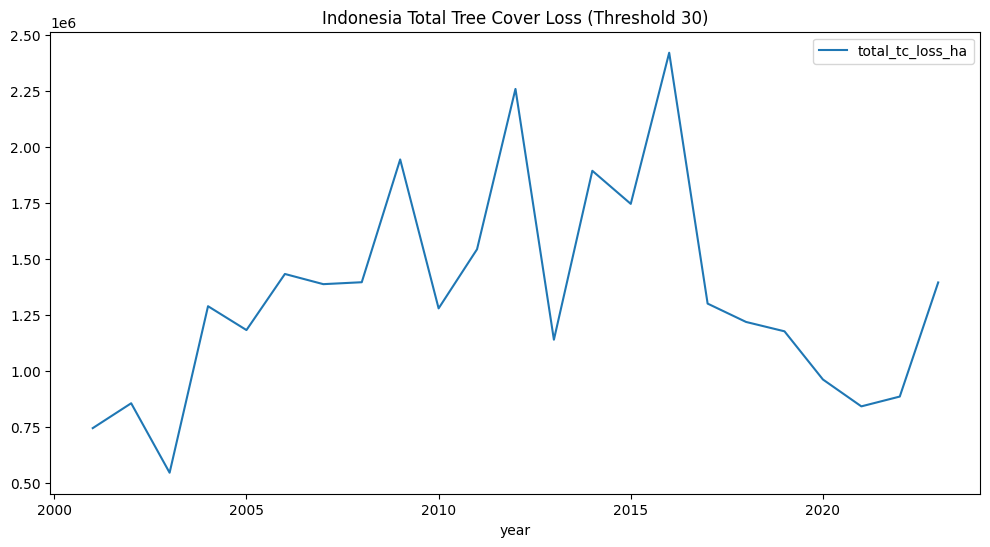

In [55]:
df = gfw_sub1.loc[gfw_sub1["threshold"] == 30].drop(columns=["subnational1", "country", "threshold"])

tc_loss_columns = [col for col in df.columns if col.startswith("tc_loss_ha_")]

tc_loss_sums = df[tc_loss_columns].sum()

tc_loss_df = pd.DataFrame({
    "year": [int(col.split("_")[-1]) for col in tc_loss_columns],  # Extract year from column names
    "total_tc_loss_ha": tc_loss_sums.values  # Corresponding summed values
})

# Sort the DataFrame by year
tc_loss_df = tc_loss_df.set_index("year").sort_index()

tc_loss_df.plot(title="Indonesia Total Tree Cover Loss (Threshold 30)", figsize=(12, 6))


In [56]:
tc_loss_df

,total_tc_loss_ha
year,
2001,744091
2002,855275
2003,544812
2004,1289042
2005,1182444
2006,1433152
2007,1387626
2008,1396255
2009,1944963


It seems like Lampung is following similar macro trends as the country Indonesia

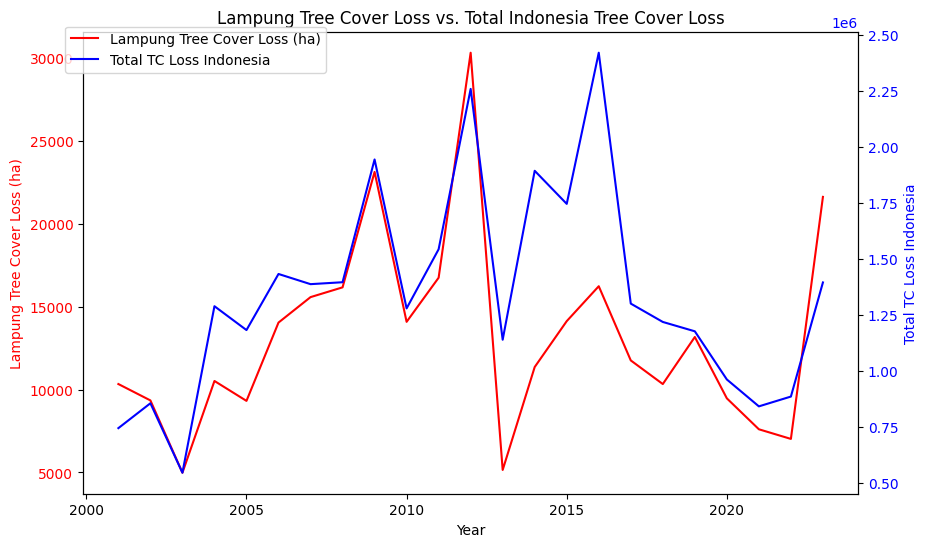

In [61]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Ensure 'year' is accessible as a column in lampung_sub1_pivoted
if lampung_sub1_pivoted.index.name == 'year':
    lampung_sub1_pivoted = lampung_sub1_pivoted.reset_index()

# Plot first variable (left axis)
ax1.plot(lampung_sub1_pivoted['year'], lampung_sub1_pivoted["tree cover lost"], color='red', label='Lampung Tree Cover Loss (ha)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Lampung Tree Cover Loss (ha)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create second y-axis
ax2 = ax1.twinx()
ax2.plot(tc_loss_df.index, tc_loss_df['total_tc_loss_ha'], color='blue', label='Total TC Loss Indonesia')  # Use index for tc_loss_df
ax2.set_ylabel('Total TC Loss Indonesia', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and legend
plt.title('Lampung Tree Cover Loss vs. Total Indonesia Tree Cover Loss')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

In [ ]:
lampung_sub1 = gfw_sub1[gfw_sub1["subnational1"] == "Lampung"].drop(columns=["subnational1", "country"])